In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

In [58]:
walkable_cities = pd.read_csv("walkable-cities.csv")
walkable_cities

,place_code,city,state,pop_estimate_2021,state_code,city_state,city_state_code,place_state_code,geo_code,land_area_sqkm,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,AL,"Auburn, Alabama","Auburn, AL",3076AL,103076.0,157.084761,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,AL,"Birmingham, Alabama","Birmingham, AL",7000AL,107000.0,380.801025,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,AL,"Decatur, Alabama","Decatur, AL",20104AL,120104.0,140.785624,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,AL,"Dothan, Alabama","Dothan, AL",21184AL,121184.0,232.650562,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,AL,"Hoover, Alabama","Hoover, AL",35896AL,135896.0,124.490626,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,WI,"Racine, Wisconsin","Racine, WI",66000WI,5566000.0,40.080067,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,WI,"Waukesha, Wisconsin","Waukesha, WI",84250WI,5584250.0,66.102904,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
757,85300,West Allis,Wisconsin,59484,WI,"West Allis, Wisconsin","West Allis, WI",85300WI,5585300.0,29.477371,...,NaN,NaN,NaN,NaN,34586.0,NaN,NaN,45.0,0.003547,0.028344
758,13150,Casper,Wyoming,58656,WY,"Casper, Wyoming","Casper, WY",13150WY,5613150.0,68.757037,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


In [59]:
#uses the loc method to select the subset of rows and columns where the column names are not duplicated. 
walkable_cities = walkable_cities.loc[:,~walkable_cities.columns.duplicated()]
#removes the specified columns from the walkable_cities dataframe
walkable_cities.drop(walkable_cities.columns[[4,5,6,7,11]], axis=1, inplace=True)
walkable_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,103076.0,157.084761,500.137630,27.8,0.483186,0.516662,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,107000.0,380.801025,518.840515,37.2,0.479291,0.514812,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,120104.0,140.785624,410.581694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,121184.0,232.650562,305.930918,40.5,0.473565,0.527952,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,135896.0,124.490626,743.742746,38.9,0.504066,0.495923,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,5566000.0,40.080067,1924.323130,34.6,0.476954,0.523098,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,5584250.0,66.102904,1077.955667,36.2,0.482654,0.517318,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
757,85300,West Allis,Wisconsin,59484,5585300.0,29.477371,2017.954722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34586.0,NaN,NaN,45.0,0.003547,0.028344
758,13150,Casper,Wyoming,58656,5613150.0,68.757037,853.090863,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


In [60]:
df = walkable_cities[['pop_estimate_2021',
       'land_area_sqkm', 'pop_per_km2', 'median_age', 'male', 'female',
       'white_alone', 'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'walk_score', 'bike_score', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']]

df.head()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,78564,157.084761,500.137630,27.8,0.483186,0.516662,0.622652,0.178313,0.003029,0.094369,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,197575,380.801025,518.840515,37.2,0.479291,0.514812,0.238942,0.694906,0.003821,0.016576,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,57804,140.785624,410.581694,NaN,NaN,NaN,0.574182,0.232527,0.007491,0.009186,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,71175,232.650562,305.930918,40.5,0.473565,0.527952,0.568964,0.335736,0.004004,0.016031,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,92589,124.490626,743.742746,38.9,0.504066,0.495923,0.687598,0.168713,0.002743,0.064036,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758


In [61]:
display(df.isna().sum())

pop_estimate_2021      0
land_area_sqkm         4
pop_per_km2            4
median_age           196
male                 196
                    ... 
poverty              196
unemployment_rate    242
median_aqi            79
violent_crime        127
property_crime       127
Length: 63, dtype: int64

In [62]:
# Do the original interpolation
df.interpolate(method='nearest', xis=0, inplace=True)

# Display result
print ('Interpolated data:')
print (df)
print ()

# Function to curve fit to the data
def func(x, *params):
    y = 0
    for i in range(len(params)):
        y += params[i] * (x ** i)
    return y

# Initial parameter guess, just to kick off the optimization
guess = [1] * len(df.columns)

# Create copy of data to remove NaNs for curve fitting
fit_df = df.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in df.columns:
    # Get the index values for NaNs in the column
    x = df[pd.isnull(df[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    df[col][x] = func(x, *col_params[col])

# Display result
print ('Extrapolated data:')
print (df)
print ()

print ('Data was extrapolated with these column functions:')

# Iterate through the number of parameters in the col_params dictionary and add the corresponding term 
# for each parameter in the string that is being printed.
for col in col_params:
    terms = []
    for i in range(len(col_params[col])):
        terms.append("{:0.3e} x^{}".format(col_params[col][i], i))
    print("f_{}(x) = {}".format(col, " + ".join(terms)))

<ipython-input-62-7c6ec34fbe47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='nearest', xis=0, inplace=True)
c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:862: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Interpolated data:
     pop_estimate_2021  land_area_sqkm  pop_per_km2  median_age      male  \
0                78564      157.084761   500.137630        27.8  0.483186   
1               197575      380.801025   518.840515        37.2  0.479291   
2                57804      140.785624   410.581694        37.2  0.479291   
3                71175      232.650562   305.930918        40.5  0.473565   
4                92589      124.490626   743.742746        38.9  0.504066   
..                 ...             ...          ...         ...       ...   
755              77127       40.080067  1924.323130        34.6  0.476954   
756              71256       66.102904  1077.955667        36.2  0.482654   
757              59484       29.477371  2017.954722        36.2  0.482654   
758              58656       68.757037   853.090863        39.3  0.481315   
759              65051       83.549538   778.591977        39.3  0.481315   

       female  white_alone  black_or_african_american_al

<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])
<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])
<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])
<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is tryi

Extrapolated data:
     pop_estimate_2021  land_area_sqkm  pop_per_km2  median_age      male  \
0                78564      157.084761   500.137630        27.8  0.483186   
1               197575      380.801025   518.840515        37.2  0.479291   
2                57804      140.785624   410.581694        37.2  0.479291   
3                71175      232.650562   305.930918        40.5  0.473565   
4                92589      124.490626   743.742746        38.9  0.504066   
..                 ...             ...          ...         ...       ...   
755              77127       40.080067  1924.323130        34.6  0.476954   
756              71256       66.102904  1077.955667        36.2  0.482654   
757              59484       29.477371  2017.954722        36.2  0.482654   
758              58656       68.757037   853.090863        39.3  0.481315   
759              65051       83.549538   778.591977        39.3  0.481315   

       female  white_alone  black_or_african_american_al

<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])
<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])
<ipython-input-62-7c6ec34fbe47>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][x] = func(x, *col_params[col])


In [63]:
# Identify all NA values in the dataframe
display(df.isna().sum())

pop_estimate_2021    0
land_area_sqkm       0
pop_per_km2          0
median_age           0
male                 0
                    ..
poverty              0
unemployment_rate    0
median_aqi           0
violent_crime        0
property_crime       0
Length: 63, dtype: int64

In [64]:
df.head()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,78564,157.084761,500.137630,27.8,0.483186,0.516662,0.622652,0.178313,0.003029,0.094369,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,1.0,1.0,1.000000e+00,1.000000e+00
1,197575,380.801025,518.840515,37.2,0.479291,0.514812,0.238942,0.694906,0.003821,0.016576,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,6.300000e+01,6.300000e+01
2,57804,140.785624,410.581694,37.2,0.479291,0.514812,0.574182,0.232527,0.007491,0.009186,...,0.443224,58012.0,27211.0,36614.0,31259.0,0.270712,7.4,39.0,9.223372e+18,9.223372e+18
3,71175,232.650562,305.930918,40.5,0.473565,0.527952,0.568964,0.335736,0.004004,0.016031,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,39.0,5.722806e+29,5.722806e+29
4,92589,124.490626,743.742746,38.9,0.504066,0.495923,0.687598,0.168713,0.002743,0.064036,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,1.231248e-03,2.075841e-02


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pop_estimate_2021                                 760 non-null    int64  
 1   land_area_sqkm                                    760 non-null    float64
 2   pop_per_km2                                       760 non-null    float64
 3   median_age                                        760 non-null    float64
 4   male                                              760 non-null    float64
 5   female                                            760 non-null    float64
 6   white_alone                                       760 non-null    float64
 7   black_or_african_american_alone                   760 non-null    float64
 8   american_indian_and_alaska_native_alone           760 non-null    float64
 9   asian_alone          

In [66]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define the numerical columns
list_numerical = df.columns.drop('walk_score')

# Define the features and target variable
X = df.drop(columns='walk_score')
y = df['walk_score']

# Split the data set into train and test set with the first 70% of the data for training and the remaining 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train.head()

,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
97,196652,69.922374,2812.433113,44.0,0.495011,0.504978,0.643731,0.011650,0.006575,0.133973,...,0.406454,137464.0,56934.0,107808.0,51843.0,0.086818,7.3,49.0,0.001963,0.021073
741,229071,178.086951,1286.287393,35.7,0.497034,0.502940,0.792401,0.027048,0.018964,0.028458,...,0.413618,77712.0,33112.0,58714.0,31747.0,0.146003,7.1,40.0,0.006635,0.056961
169,815201,121.507089,6709.081805,40.4,0.511914,0.488086,0.443304,0.057317,0.007943,0.363720,...,0.430318,181909.0,80383.0,121826.0,47304.0,0.111424,8.4,64.0,0.007278,0.059838
387,60011,53.181793,1128.412500,28.5,0.485224,0.514559,0.809602,0.070887,0.002766,0.035460,...,0.393681,66927.0,28036.0,43443.0,32506.0,0.200669,4.4,41.0,0.002250,0.040526
680,63671,53.728029,1185.061153,35.3,0.507225,0.519043,0.521054,0.173705,0.007554,0.078984,...,0.401531,98320.0,38765.0,79649.0,37075.0,0.085723,5.3,42.0,0.001332,0.018042


In [67]:
from sklearn.preprocessing import StandardScaler

# standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation.
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

X_train

c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\daklu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:86: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


,pop_estimate_2021,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
97,0.180646,-0.350968,1.205567,1.709333,0.122293,-0.160842,0.523249,-0.810250,-0.371386,0.524419,...,0.493385,1.212435,1.500445,1.358413,2.145355,-0.805020,0.206208,0.156162,-0.043396,-0.043396
741,0.306164,0.290593,-0.171478,-0.145374,0.224087,-0.263701,1.298812,-0.705446,0.735365,-0.495954,...,0.639807,-0.567170,-0.331644,-0.547265,-1.105533,0.140809,0.127737,-0.379443,-0.043396,-0.043396
169,2.575507,-0.045002,4.721522,0.904882,0.973160,-1.013341,-0.522315,-0.499433,-0.249194,2.746185,...,0.981111,2.536149,3.303848,1.902548,1.411090,-0.411795,0.637800,1.048838,-0.043396,-0.043396
387,-0.348392,-0.450262,-0.313929,-1.754277,-0.370424,0.322649,1.388544,-0.407075,-0.711662,-0.428244,...,0.232345,-0.888382,-0.722027,-1.140038,-0.982751,1.014434,-0.931625,-0.319931,-0.043396,-0.043396
680,-0.334221,-0.447022,-0.262815,-0.234758,0.737107,0.548957,-0.116721,0.292720,-0.283890,-0.007346,...,0.392761,0.046602,0.103114,0.265367,-0.243634,-0.822528,-0.578504,-0.260420,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-0.339084,-0.105710,-0.825976,0.055739,1.057115,-1.098618,1.559526,-0.701545,-0.184428,-0.670605,...,1.038430,-0.454173,-0.094154,-0.459422,-0.468815,-0.610372,-0.735447,-0.796025,-0.043396,-0.043396
320,-0.334384,-0.414642,-0.362081,0.189814,0.343305,-0.379560,0.349852,-0.832100,0.271148,-0.686962,...,0.729145,0.110785,0.414512,-0.100754,-0.658892,-0.679476,-1.559395,-0.617490,-0.043396,-0.043396
527,-0.015066,-0.380739,0.699070,-0.704021,-0.803383,0.774935,-0.293552,1.234151,-0.097838,-0.082592,...,0.952042,-1.253643,-1.021812,-1.270734,-0.606156,1.922484,0.049266,-0.617490,-0.043396,-0.043396
125,0.238521,0.022793,0.104125,-0.905134,0.236618,-0.273273,-1.678446,0.176988,0.726631,-0.196873,...,-2.587847,-0.110236,-0.930984,0.272781,0.038813,-0.539382,0.559329,2.417607,-0.043396,-0.043396


In [72]:
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train = imputer.fit_transform(X_train)

# Transform the test set
X_test = imputer.transform(X_test)

# Fit and train the Lasso model on the training data with alpha=1
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

# Print the R squared for the training and test sets

print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 74.28
R squared test set 56.87


In [73]:
# Calculate the mean squared error for the training and test sets
# Training data

pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data

pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 62.97
MSE test set 130.33


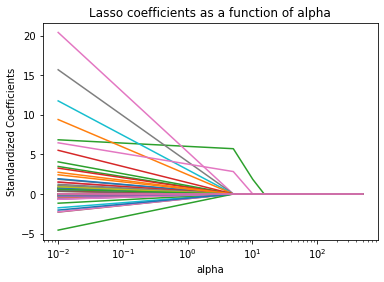

In [74]:
# Plot the Lasso coefficients as a function of alpha

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [75]:
#Another Linear Regression model

from sklearn.linear_model import LassoCV

"""
LassoCV is a type of linear regression model that uses L1 regularization. LassoCV performs Lasso
regression with cross-validation.

The model is initialized with a cv value of 5, meaning that it will use 5-fold cross-validation when
training.

Random_state is set to 0 for reproducibility and max_iter is set to 10000 to increase the number of 
iterations for convergence.
"""
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# The best alpha value is chosen from the cross-validation process and used to create a new Lasso model
lasso_best = Lasso(alpha=model.alpha_)
#Fit this new Lasso model to the training data
lasso_best.fit(X_train, y_train)

# Create a list of feature importance tuples
feature_importance = list(zip(X.columns, lasso_best.coef_))

# Sort the feature importance list by coefficient in descending order
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, coef in sorted_feature_importance:
    print(feature, coef)

pop_per_km2 7.180194195769099
white_alone 7.046698860794268
bike_score 6.467829507052659
hispanic_or_latino 5.93438397909721
black_or_african_american_alone 5.508655716407034
asian_alone 4.611879175852877
work_from_home 2.77010873106417
teethlost 2.47709270421379
sleep 1.9815824793396346
chd 1.9052639254649302
casthma 1.862762775278566
some_other_race_alone 1.7863675828989687
binge 1.3906712673431088
mammouse 1.3593782147121056
bphigh 1.322570091956064
drive_commute 1.2578810191294527
checkup 1.203090486284252
dental 0.9546449270396921
households 0.8214882133201473
median_age 0.6007831689611631
cumulative_confirmed 0.5264769349476672
native_hawaiian_and_other_pacific_islander_alone 0.5055717668775218
pop_estimate_2021 0.498797815809215
cancer 0.4423329577937549
corew 0.39655221403952184
american_indian_and_alaska_native_alone 0.2794366432134326
cumulative_deceased 0.10713604185869433
public_transit_commute 0.09410097145689782
male 0.033472990924971954
female -0.0
two_or_more_races 0.0


In [76]:
# Evaluate the model's performance on the training and test sets by printing the R-squared score
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

# Print the mean squared error of the predictions on the test set
mean_squared_error(y_test, lasso_best.predict(X_test))

R squared training set 82.07
R squared test set 63.15


111.3556021617837

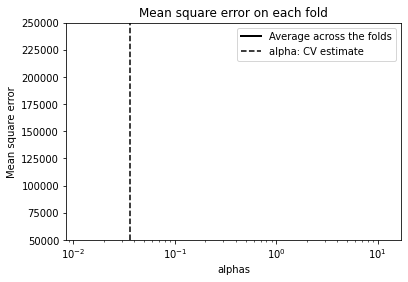

In [77]:
# Lasso path: plot results of cross-validation with mean squared error
plt.semilogx(model.alphas_, model.mse_path_, ":")
# Plot the average mean squared error across all folds for each value of alpha
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
# Add a vertical line to indicate the value of alpha chosen by the LassoCV
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

# Add legend and labels
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

# Set the y-axis limits
ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);